In [1]:
import pandas as pd

# Cargar dataset

In [2]:
df = pd.read_csv('../dsrp_ml_1/data/WHR.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# Preprocesamiento

In [4]:
import re
df.columns = [re.sub(r'[^\w\s]',' ',column_name).lower() for column_name in df.columns]

df.columns

Index(['overall rank', 'country or region', 'score', 'gdp per capita',
       'social support', 'healthy life expectancy',
       'freedom to make life choices', 'generosity',
       'perceptions of corruption'],
      dtype='object')

In [5]:
df.drop(columns=['overall rank'], inplace=True)

In [6]:
mapping = {'country': 'country', 'score' : 'happiness score', 'gdp' : 'gdp per capita',
'social support' : 'family', 'health' : 'life expectancy', 'freedom' : 'freedom', 'corruption' : 'lack of corruption'}

for column_name in df.columns:
  for key in mapping:
    if key in str(column_name):
      df.rename(columns={column_name: mapping[key]}, inplace=True)
      break

In [7]:
df.head()

,country,happiness score,gdp per capita,family,life expectancy,freedom,generosity,lack of corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# Análisis exploratorio

In [8]:
df.sort_values(by='happiness score', ascending=False).head(10)

,country,happiness score,gdp per capita,family,life expectancy,freedom,generosity,lack of corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [9]:
df[df['country'] == 'Peru'].sort_values(by='happiness score', ascending=False)

,country,happiness score,gdp per capita,family,life expectancy,freedom,generosity,lack of corruption
64,Peru,5.697,0.96,1.274,0.854,0.455,0.083,0.027


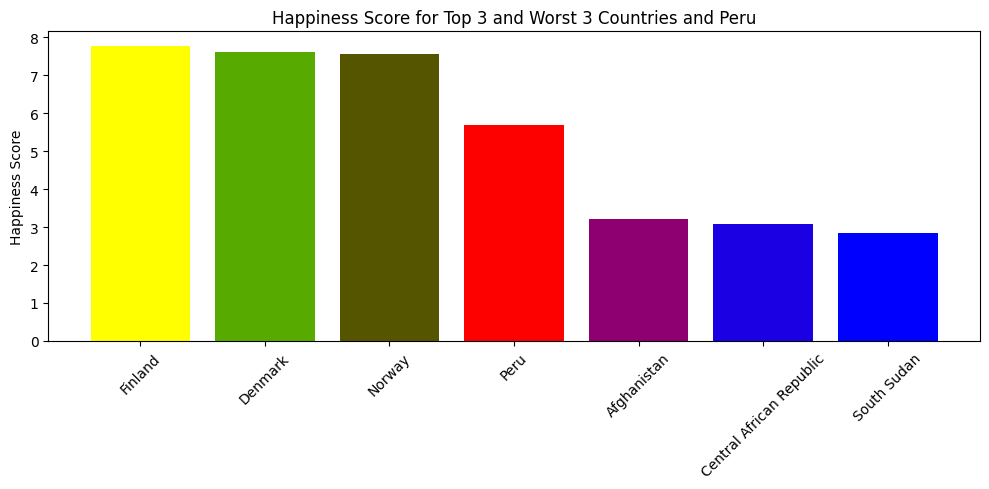

In [12]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np

top_5 = df.sort_values(by='happiness score', ascending=False).head(3)
worst_5 = df.sort_values(by='happiness score', ascending=False).tail(3)
peru = df[df['country'] == 'Peru'].sort_values(by='happiness score', ascending=False)

countries = top_5['country'].tolist() + peru['country'].tolist()  + worst_5['country'].tolist()
happiness_scores = top_5['happiness score'].tolist() + peru['happiness score'].tolist() + worst_5['happiness score'].tolist()

clist = [(0, "blue"), (0.125, "blue"), (0.5, "red"), (0.75, "green"), (1, "yellow")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

plt.figure(figsize=(10, 5))
plt.bar(countries, happiness_scores, color=rvb(np.linspace(1, 0, len(countries))))
plt.xticks(rotation=45)
plt.ylabel('Happiness Score')
plt.title('Happiness Score for Top 3 and Worst 3 Countries and Peru')
plt.tight_layout()
plt.show()

# Análisis de correlación

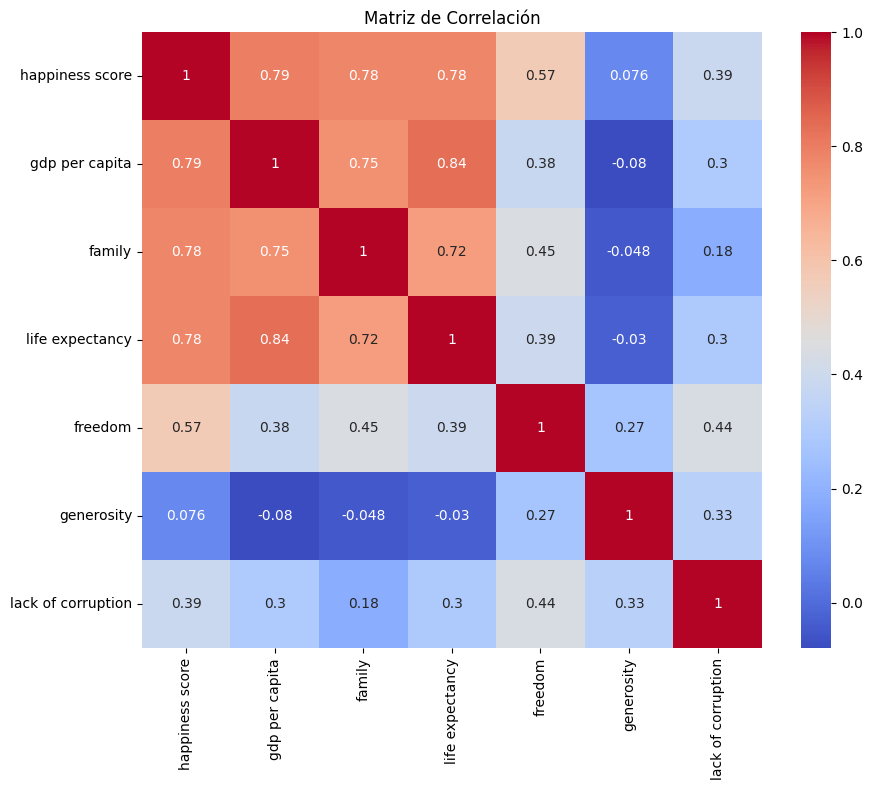

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlaciones
corr = df[['happiness score', 'gdp per capita', 'family', 'life expectancy',
           'freedom', 'generosity', 'lack of corruption']].corr()

# Mostrar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

# Conclusión

Los valores de correlación > 0.5 los tomaré para entrenar el modelo lineal.
- gdp per capita
- family
- life expectancy
- freedom

In [16]:
import joblib

# Guardar el DataFrame preprocesado
joblib.dump(df, '../dsrp_ml_1/data/WHR_preprocesado.joblib')

['../dsrp_ml_1/data/WHR_preprocesado.joblib']